# Examen Math - Caculli Giorgio LA196672

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Lecture du fichier de données

In [2]:
PATH = "abalone_clean.csv"
abalone = pd.read_csv(PATH)

# Analyse des données

On affiche les données stockés dans le fichier CSV

In [3]:
abalone.shape

(4177, 8)

In [4]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sex                         4177 non-null   object 
 1    Longest Shell measurement  4177 non-null   float64
 2   Diameter                    4177 non-null   float64
 3   Height                      4177 non-null   float64
 4   Weight of whole             4177 non-null   float64
 5   Weight of meat              4177 non-null   float64
 6   Shell weight                4177 non-null   float64
 7   Rings                       4177 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 261.2+ KB


In [5]:
abalone.head()

,Sex,Longest Shell measurement,Diameter,Height,Weight of whole,Weight of meat,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.055,7


In [6]:
abalone.describe()

,Longest Shell measurement,Diameter,Height,Weight of whole,Weight of meat,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,1.005000,29.000000


# Déterminer les meilleurs paramètres ou features

On initialise les "features" avec lesquelles on va travailler

In [7]:
features = [' Longest Shell measurement', 'Diameter', 'Height', 'Weight of whole', 'Weight of meat', 'Shell weight']

On determine que "Age" est la valeur avec laquelle on souhaite travailler

In [8]:
name_target = 'Age'

Etant donné que le "Sexe" est marqué par une lettre on le convertira en nombres pour l'analyser

In [9]:
sex_dummies = pd.get_dummies(abalone['Sex'], prefix='Sex_')

abalone = pd.concat([abalone, sex_dummies], axis=1)

On rempli la colonne "Age" avec des valeurs, ici, le nombre de rings + 1.5

In [10]:
abalone[name_target] = abalone['Rings'].apply(lambda age: age + 1.5)

On mélange les informations pour pouvoir en tirer des tranches de données que l'on analysera

In [11]:
indices = np.random.permutation(abalone.index)
length_data = abalone.shape[0]
limit_train = int(length_data * 0.80)
train = abalone.iloc[:limit_train]
test = abalone.iloc[limit_train:]

On initialise un vecteur contenant les différents types de sexes rencontrés, ici M, F et I.

In [12]:
sexes = [sex for sex in abalone.columns if sex.startswith('Sex_')]
sexes

['Sex__F', 'Sex__I', 'Sex__M']

On crée les valeurs de y

In [13]:
target = train[name_target]

On ajoute aux features à analyser les différents sexes sous formes de 0 ou 1

In [14]:
all_features = features + sexes

On affiche le nouveau tableau avec les différents sexes

In [15]:
abalone.head()

,Sex,Longest Shell measurement,Diameter,Height,Weight of whole,Weight of meat,Shell weight,Rings,Sex__F,Sex__I,Sex__M,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.150,15,0,0,1,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.070,7,0,0,1,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.210,9,1,0,0,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.155,10,0,0,1,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.055,7,0,1,0,8.5


On calcule la corrélation et on affiche un graphique représentant les différentes relations

In [16]:
corr = abalone.corr()

corr

,Longest Shell measurement,Diameter,Height,Weight of whole,Weight of meat,Shell weight,Rings,Sex__F,Sex__I,Sex__M,Age
Longest Shell measurement,1.000000,0.986812,0.827554,0.925261,0.897914,0.897706,0.556720,0.309666,-0.551465,0.236543,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.905330,0.574660,0.318626,-0.564315,0.240376,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.817338,0.557467,0.298421,-0.518552,0.215459,0.557467
Weight of whole,0.925261,0.925452,0.819221,1.000000,0.969405,0.955355,0.540390,0.299741,-0.557592,0.252038,0.540390
Weight of meat,0.897914,0.893162,0.774972,0.969405,1.000000,0.882617,0.420884,0.263991,-0.521842,0.251793,0.420884
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,1.000000,0.627574,0.306319,-0.546953,0.235391,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.627574,1.000000,0.250279,-0.436063,0.181831,1.000000
Sex__F,0.309666,0.318626,0.298421,0.299741,0.263991,0.306319,0.250279,1.000000,-0.464298,-0.512528,0.250279
Sex__I,-0.551465,-0.564315,-0.518552,-0.557592,-0.521842,-0.546953,-0.436063,-0.464298,1.000000,-0.522541,-0.436063
Sex__M,0.236543,0.240376,0.215459,0.252038,0.251793,0.235391,0.181831,-0.512528,-0.522541,1.000000,0.181831


<AxesSubplot:>

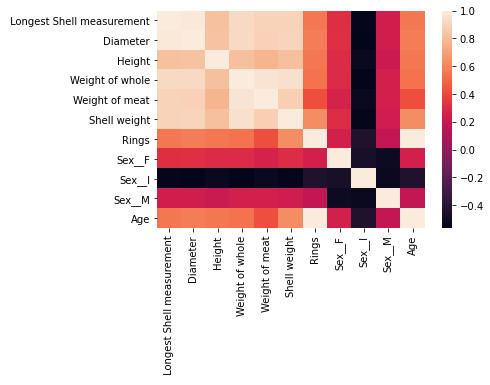

In [17]:
sns.heatmap(corr)

# Construction du modèle

On crée des formules qui nous serviront pour calculer le carré des y actuels et y prédits

In [18]:
def r_squared(y_actuals, y_predict):
    sst = ((y_actuals - y_actuals.mean()) ** 2).sum()
    sse = ((y_actuals - y_predict) ** 2).sum()
    return 1 - (sse / sst)

In [19]:
def r_squared_adjusted(y_actuals, y_predict, n_features):
    r_s = r_squared(y_actuals, y_predict)
    n = y_actuals.shape[0]
    return 1 - (1 - r_s) * ((n - 1) / (n - n_features - 1))

On initialise les algorithmes qui nous serviront pour faire nos prédictions, dans ce cas, on utilise le kfold pour
calculer le mean squared error

In [20]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
rfecv = RFECV(LinearRegression(), step=1, cv=kfold, scoring='neg_mean_squared_error')

On détermine que le X sera les features à partir duquel on va faire nos calculs, et le Y sera la variable à prédire

In [21]:
x = abalone[all_features]
y = abalone[name_target]

On impose les résultats obtenus par les valeurs des calculs de X vers le target Y.

In [22]:
rfecv.fit(x, y)

RFECV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
      estimator=LinearRegression(), scoring='neg_mean_squared_error')

# Explication du modèle obtenu

À partir des calculés menés dans rfcev.fit, on peut voir quels parties de nos données pourraient être considérees comme
important lors de nos prédictions. Ici on démarre de toutes les features qu'on lui a imposée avec celles déterminées
par rfcev. Puis dans important features on supprimes celles inutiles

In [23]:
features_and_support = pd.concat([pd.Series(all_features), pd.Series(rfecv.support_)], axis=1)
features_and_support

,0,1
0,Longest Shell measurement,True
1,Diameter,True
2,Height,True
3,Weight of whole,True
4,Weight of meat,True
5,Shell weight,True
6,Sex__F,False
7,Sex__I,True
8,Sex__M,True


In [24]:
important_features = features_and_support[features_and_support.iloc[:, 1]].iloc[:, 0]
important_features

0     Longest Shell measurement
1                      Diameter
2                        Height
3               Weight of whole
4                Weight of meat
5                  Shell weight
7                        Sex__I
8                        Sex__M
Name: 0, dtype: object

# Prédiction de résultats

On fait nos prédictions sur les valeurs que l'ordinateur a considérées comme utiles

In [25]:
pred_1 = test[important_features]

lr_1 = LinearRegression()
lr_1.fit(train[important_features], train[name_target])

prediction_1 = lr_1.predict(pred_1)

print("R squared (sklearn):", r2_score(test[name_target], prediction_1))
print("R squared (manual):", r_squared(test[name_target], prediction_1))
print("Adjusted R squared:", r_squared_adjusted(test[name_target], prediction_1, important_features.shape[0]))

R squared (sklearn): 0.4414835319250081
R squared (manual): 0.4414835319250081
Adjusted R squared: 0.43608071240312185


In [26]:
mses = cross_val_score(LinearRegression(), abalone[important_features], abalone[name_target],
                       cv=kfold, scoring='neg_mean_squared_error')
mean_mse = -np.mean(mses)
rmse = mean_mse ** 0.5
print(rmse)


2.234665137172385
